In [1]:
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry #common function

import pandas as pd

import numpy as np

%matplotlib inline

import pickle

import visdom

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

from time import time,sleep
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity
# import visdom
# vis=visdom.Visdom()
# env="TagBased"

import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning,)
# %matplotlib inline

import re

from pprint import pprint
#coding:utf-8
import matplotlib.pyplot as plt

list_industry=["水泥","食品飲料","石化","紡織","電機機械","電器電纜","化學工業",
               "建材居家用品","造紙","鋼鐵金屬","車輛相關","科技相關","營建地產","運輸","觀光休閒娛樂",
               "金融相關","百貨通路","公用事業","控股","生技醫療保健","農林漁牧","航天軍工","能源","傳播出版","綜合",
               "傳產其他","其他","金屬礦採選",
              ]

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v01.npy")

In [3]:
with open("D:3.AutoencoderForArticle/train_dict_collect_small_industry","rb") as f:
    train_dict_collect_small_industry=pickle.load(f)

In [4]:
with open("D:3.AutoencoderForArticle/test_dict_collect_small_industry","rb") as f:
    test_dict_collect_small_industry=pickle.load(f)

In [5]:
from keras.models import load_model

In [10]:
# custommed function
def noisefunction(x):
    x_noise=K.ones_like(x)
    return K.in_train_phase(x_noise,x,1)

def tripletlossfunction(inputs):
    r01=inputs[0]
    r02=inputs[1]
    loss=K.log(1+K.exp(r02-r01))
#     x=np.array([[0],[1],[0],[1]])
#     x=K.variable(x)
    return loss

def losspassfunction(y_true,y_pred):
    return y_pred

def test(inputs):
#     x=K.dot(inputs,k.transpose(inputs))
    x=K.transpose(inputs)
    return x

In [12]:
encoder=load_model("encoder_trained.h5")
Tri_AutoEncoder=load_model("Tri_AutoEncoder_trained.h5",custom_objects={"losspassfunction":losspassfunction})

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [119]:
set(y)

{'傳播出版', '營建地產', '生技醫療保健', '百貨通路', '車輛相關'}

In [165]:
train_x=Data[train_x_index]
train_embeddings=encoder_in_AE.predict(train_x)

## Tsne on Original Data

In [264]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0,perplexity=40,verbose=1)
intermediates_tsne = tsne.fit_transform(train_x)

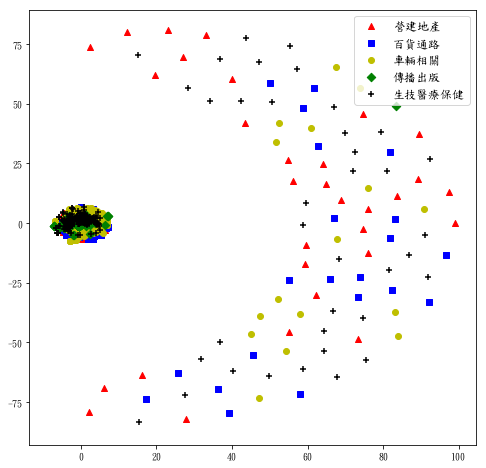

In [265]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

## Tsne on embedding of Train data
<li>Reconstruct Encoder
<li>PaPrepare train data for Tsne
<li>metric Euclidean metric
<li>metric Euclidean metric
<li>metric Euclidean metric

### Reconstruct Encoder

In [175]:
encoder_in_AE=Tri_AutoEncoder.layers[3]

### Prepare data for Tsne

In [161]:
train_x_index=[]
train_y=[]
for k in train_dict_collect_small_industry:
    newslist=train_dict_collect_small_industry[k]
    num=len(newslist)
    train_x_index+=newslist
    _=[k]*num
    train_y+=_

### metric distance

In [262]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_embeddings=train_embeddings
c=train_y
#trian
tsne = TSNE(n_components=2, random_state=0,perplexity=40,verbose=1)
intermediates_tsne=tsne.fit_transform(tsne_embeddings)




[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1312 samples in 0.004s...
[t-SNE] Computed neighbors for 1312 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1312
[t-SNE] Computed conditional probabilities for sample 1312 / 1312
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.927868
[t-SNE] Error after 1000 iterations: 0.441808


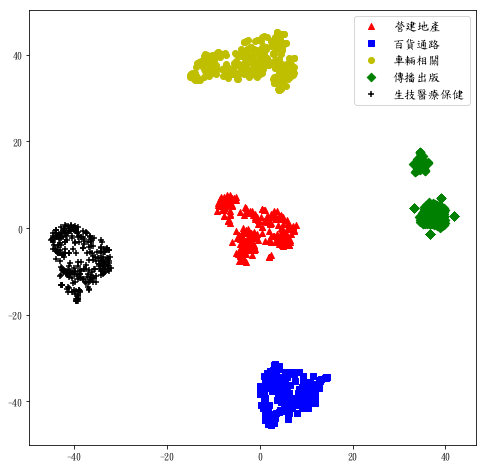

In [263]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

### metric cosine

In [260]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_embeddings=train_embeddings
c=train_y
#trian
tsne = TSNE(n_components=2, random_state=0,perplexity=40,verbose=1,metric=cosine)
intermediates_tsne=tsne.fit_transform(tsne_embeddings)




[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1312 samples in 0.169s...
[t-SNE] Computed neighbors for 1312 samples in 17.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1312
[t-SNE] Computed conditional probabilities for sample 1312 / 1312
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.894577
[t-SNE] Error after 1000 iterations: 0.443599


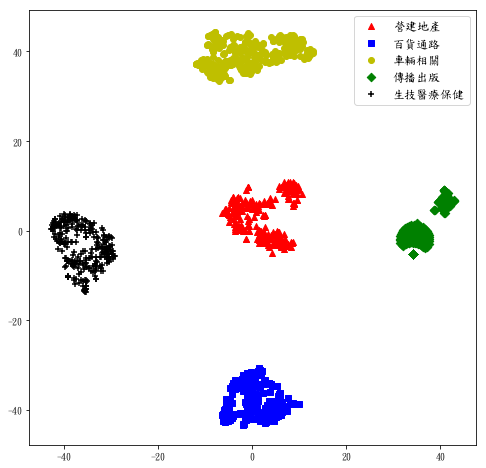

In [261]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

### metric dot

In [258]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine

#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig
#set
tsne_embeddings=train_embeddings
c=train_y
#trian
tsne = TSNE(n_components=2, random_state=0,perplexity=40,verbose=1,metric=dot)
intermediates_tsne=tsne.fit_transform(tsne_embeddings)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1312 samples in 0.032s...
[t-SNE] Computed neighbors for 1312 samples in 2.570s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1312
[t-SNE] Computed conditional probabilities for sample 1312 / 1312
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.144249
[t-SNE] Error after 1000 iterations: 0.752379


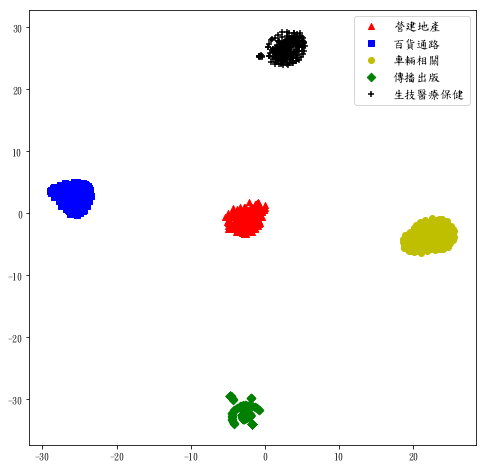

In [259]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

## Tsne on embedding of test data
<li>prepare test set for tsen(must)
<li>metric Euclidean metric
<li>metric Euclidean metric
<li>metric Euclidean metric

### prepare test set for tsen

In [1]:
test_x_index=[]
test_y=[]
for k in test_dict_collect_small_industry:
    newslist=test_dict_collect_small_industry[k]
    num=len(newslist)
    test_x_index+=newslist
    _=[k]*num
    test_y+=_

test_x=Data[test_x_index]
test_embeddings=encoder_in_AE.predict(test_x)

NameError: name 'test_dict_collect_small_industry' is not defined

### metric Euclidean metric 

In [256]:
from sklearn.manifold import TSNE
#set
tsne_embeddings=test_embeddings
c=test_y

tsne = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=1000,verbose=1)
intermediates_tsne = tsne.fit_transform(embeddings)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 332 samples in 0.001s...
[t-SNE] Computed neighbors for 332 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 332 / 332
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.335594
[t-SNE] Error after 1000 iterations: 0.330384


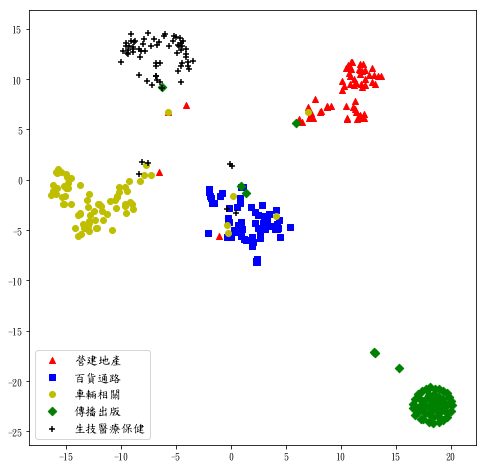

In [257]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

### metric cosine metric 

In [254]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=test_embeddings
c=test_y
#train
tsne = TSNE(n_components=2, random_state=0,perplexity=40,metric=cosine,verbos=1)
intermediates_tsne=tsne.fit_transform(tsne_data)


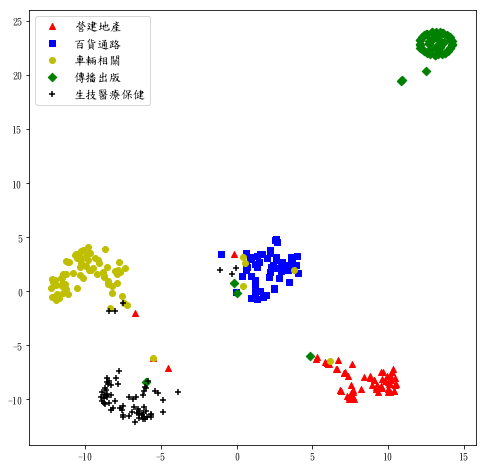

In [255]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

### metric dot metric 

In [252]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=test_embeddings
c=test_y
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,perplexity=40,metric=dot,verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 332 samples in 0.007s...
[t-SNE] Computed neighbors for 332 samples in 0.278s...
[t-SNE] Computed conditional probabilities for sample 332 / 332
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 57.3134460, gradient norm = 0.4655025 (50 iterations in 0.223s)
[t-SNE] Iteration 100: error = 57.2874031, gradient norm = 0.4675584 (50 iterations in 0.212s)
[t-SNE] Iteration 150: error = 55.2527695, gradient norm = 0.4887249 (50 iterations in 0.216s)
[t-SNE] Iteration 200: error = 59.5185013, gradient norm = 0.4395629 (50 iterations in 0.218s)
[t-SNE] Iteration 250: error = 57.2597160, gradient norm = 0.4650860 (50 iterations in 0.226s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.259716
[t-SNE] Iteration 300: error = 0.2108718, gradient norm = 0.0045165 (50 iterations in 0.191s)
[t-SNE] Iteration 350: error = 0.2007750, gradient norm = 0.0002799 

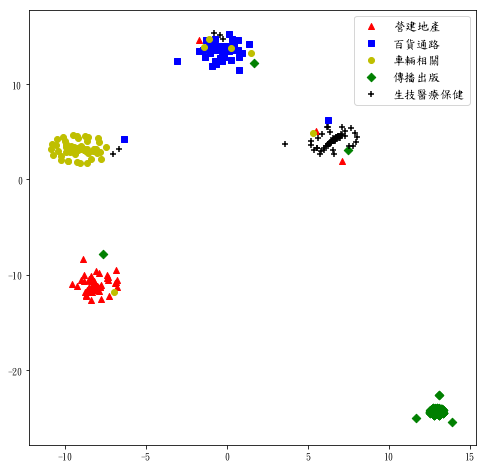

In [253]:
#plot
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

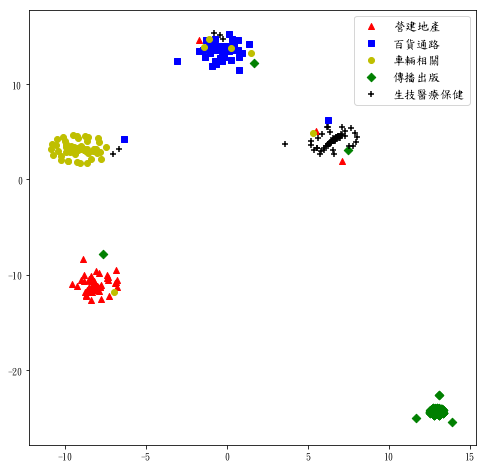

In [251]:
color=["r","b","y","g","k"]
marker=["^","s","o","D","+"]
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

ax=plt.figure(figsize=(8, 8),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],c=color[i],marker=marker[i],label=k,)
plt.legend(fontsize=12)

## TSNE of TestSet(12491 from 50000)

#### Load data

In [4]:
train_x=np.load("D:3.AutoencoderForArticle/train_x_v2_50000.npy")
train_y=np.load("D:3.AutoencoderForArticle/train_y_v2_50000.npy")
test_x=np.load("D:3.AutoencoderForArticle/test_x_v2_50000.npy")
test_y=np.load("D:3.AutoencoderForArticle/test_y_v2_50000.npy")

#### Load Model

In [ ]:
def losspassfunction(y_true,y_pred):
    return y_pred
path="Models/Model3_on_all_industry/"
Tri_AutoEncoder=load_model(path+"bestmodel.hdf5",custom_objects={"losspassfunction":losspassfunction})
# Tri_AutoEncoder.load_weights(path+"regular/weights.2649.hdf5")
encoder=Tri_AutoEncoder.layers[3]

#### Embedding

In [114]:
# np.random.seed(0)
pick=np.random.permutation(len(train_x))[:1000]
train_x_pick=train_x[pick]
train_y_pick=train_y[pick]

In [215]:
np.random.seed(0)
pick=np.random.permutation(len(test_y))[:1000]
test_x_pick=test_x[pick]
test_y_pick=test_y[pick]
pick

array([ 6199,  4827,  6751,   605,  1346,  8175, 12401,  8594, 10969,
        7198,  4168,  1312,   343,  3020,  3645,  5452,  3861,  9725,
       10779,  6455, 11315, 10912,  4214,  8136,  5632,  8523,  2607,
         643,  7383,  6901,  6553,  7066,  2458,  2836, 10880,  8905,
        9991,  8387,  3992,  7639, 10136,  9732,  1656,  2643,  1292,
       10655,  1523,  9340,   491, 11995,  2137,  9793,  6671, 12489,
       10643,  5221, 10147,  6683,  7693, 10866, 11123,  6351,  2954,
        6539,  8725,  9929,   154,  1121, 11519,  8482,  6227,  7565,
        5205, 12085,  8788,  8097,  3398,  1501,  1217, 12111,  1872,
       10132,  2397,  5318,  1856, 11910,  2470,  2783, 11199,  1654,
       12309,   308,  6954, 11779,  9188,  6688,   393, 10236,  9494,
       10404, 10973,  3253,  1540,  1783,  1662,  7796,  8050,  9668,
       12428,  8244,  8202,  5475, 11236,   449,  6586,  6264,  9140,
        4608,  2839,  5653,   335,  6851,  2004,  6522,   950,  9041,
        1997,  7417,

In [277]:
emnedding_test_x=encoder.predict(test_x)
emnedding_test_x.shape

(12491, 100)

In [315]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=emnedding_test_x
c=test_y
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,
            perplexity=50,
            n_iter=1000,
            metric=cosine,
            verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12491 samples in 2.382s...
[t-SNE] Computed neighbors for 12491 samples in 2158.477s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12491
[t-SNE] Computed conditional probabilities for sample 2000 / 12491
[t-SNE] Computed conditional probabilities for sample 3000 / 12491
[t-SNE] Computed conditional probabilities for sample 4000 / 12491
[t-SNE] Computed conditional probabilities for sample 5000 / 12491
[t-SNE] Computed conditional probabilities for sample 6000 / 12491
[t-SNE] Computed conditional probabilities for sample 7000 / 12491
[t-SNE] Computed conditional probabilities for sample 8000 / 12491
[t-SNE] Computed conditional probabilities for sample 9000 / 12491
[t-SNE] Computed conditional probabilities for sample 10000 / 12491
[t-SNE] Computed conditional probabilities for sample 11000 / 12491
[t-SNE] Computed conditional probabilities for sample 12000 / 12491
[t-SNE] Computed conditional probabilities for

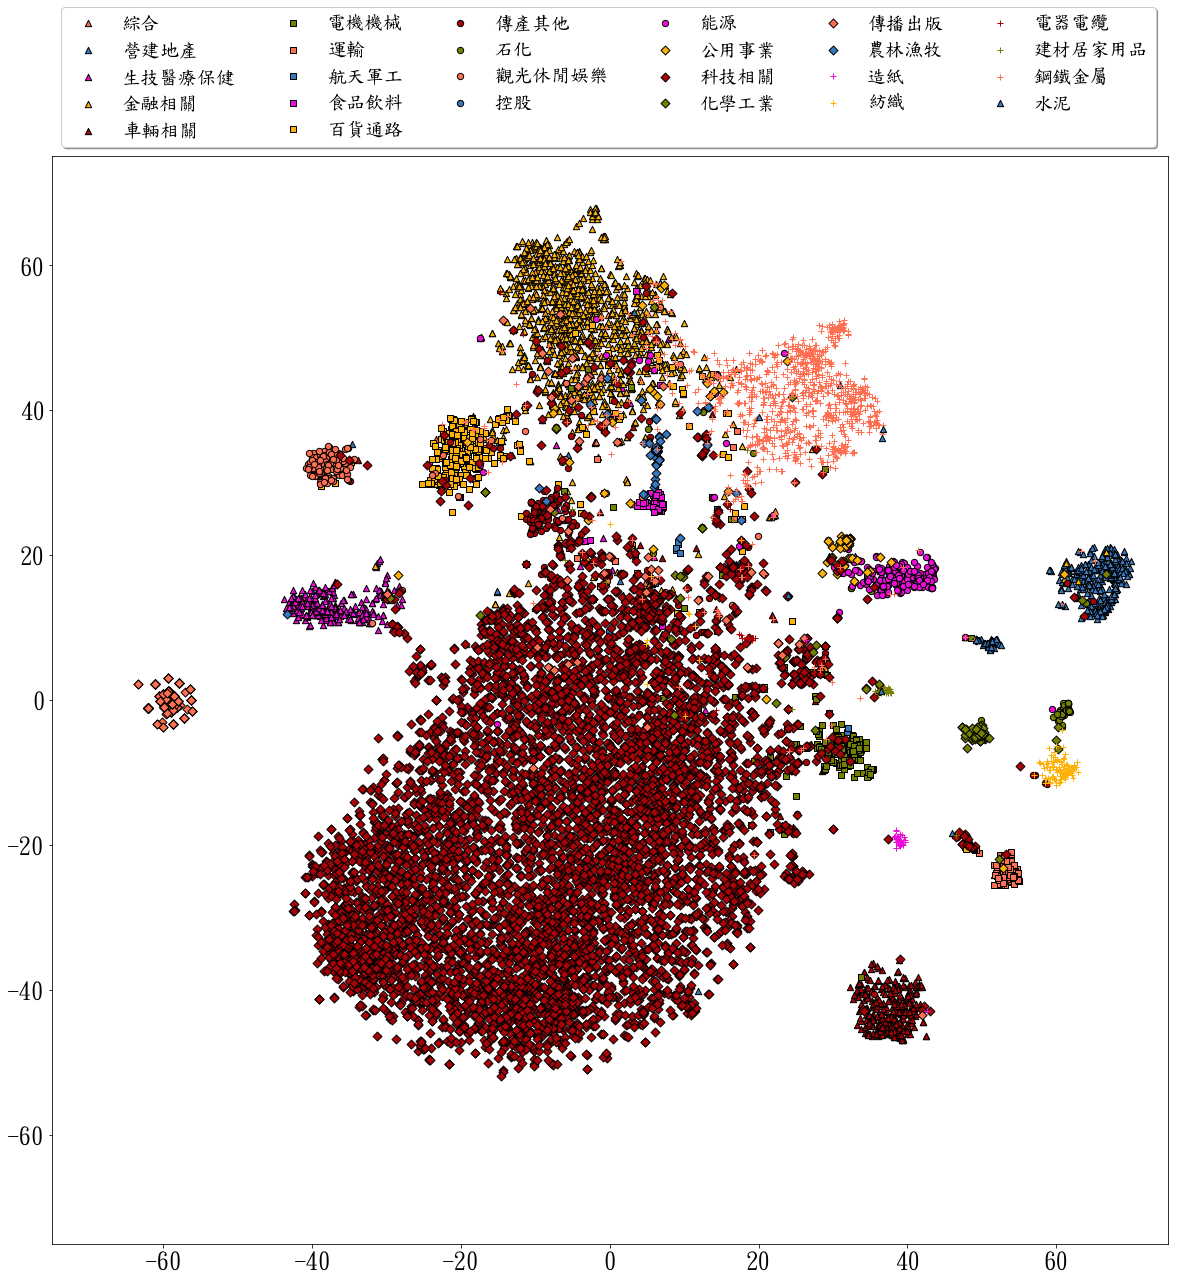

In [317]:
#plot
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000"]
marker=["^","s","o","D","+","x"]
import matplotlib
plt.figure(figsize=(20,20),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=40,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(marker))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-75,75))
plt.ylim((-75,75))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("tsnefig/cosine.test.png")